In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

## Preprocessing

In [ ]:
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
noID_application_df = application_df.drop(columns = ["EIN", "NAME"])

In [4]:
# Determine the number of unique values in each column.
noID_application_df[noID_application_df.columns].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
noID_application_df["APPLICATION_TYPE"].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    noID_application_df['APPLICATION_TYPE'] = noID_application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
noID_application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
noID_application_df["CLASSIFICATION"].value_counts(sort=False)

CLASSIFICATION
C1000    17326
C2000     6074
C3000     1918
C1200     4837
C2700      104
         ...  
C1248        1
C6100        1
C1820        1
C1900        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# creating two individual lists that can be iterated over in parallel. 
#These are not joined together because value_counts() does not return a value description when loaded into a variable.
#sort=False is passed into value_counts() because unique() also returns an unsorted list. In this configuration, both just return values in the order they are observed in the dataframe.
unique_vals = noID_application_df["CLASSIFICATION"].value_counts(sort=False) # (1)
unique_cats = noID_application_df["CLASSIFICATION"].unique()

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
classifications_to_replace = [unique_cats[i] for i in range(0,len(unique_vals)) if unique_vals.iloc[i] < 1000]

# Replace in dataframe
for classification in classifications_to_replace:
    noID_application_df['CLASSIFICATION'] = noID_application_df['CLASSIFICATION'].replace(classification,"Other")

# Check to make sure replacement was successful
noID_application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_target_cols = noID_application_df.drop(columns=["ASK_AMT","IS_SUCCESSFUL"]).columns

# Module 19; Lesson 2; Activity 4
#https://stackoverflow.com/questions/77643432/why-is-pd-get-dummies-returning-boolean-values-instead-of-the-binaries-of-0-1
dummies = pd.get_dummies(noID_application_df[categorical_target_cols], dtype = int) 

In [11]:
#combine non-categorical columns with new dummy columns
final_df = pd.concat([dummies, noID_application_df[["ASK_AMT","IS_SUCCESSFUL"]]], axis = 1) # Module 19; Lesson 2; Activity 4
final_df.shape

(34299, 44)

In [12]:
# Split our preprocessed data into our features and target arrays
X = final_df.drop(columns=["IS_SUCCESSFUL"])
y = final_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [36]:
#Instantiate neural network model
#Module 21; Lesson 1; Activity 2
nn = tf.keras.models.Sequential()

#add input layer
input_dims = X_train_scaled.shape[1]
nn.add(tf.keras.layers.Dense(units = 80, activation = 'relu', input_dim = input_dims))

# First hidden layer
nn.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [37]:
# Check the structure of the model
nn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 20)             │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,361 (20.94 KB)

 Trainable params: 5,361 (20.94 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# callback to record model weights at intervals of five training epochs.
weights_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = 'models/callbacks/model_weights.weights.h5', 
                                                        save_weights_only=True,
                                                        save_freq=5) #https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint


In [39]:
# Compile the model
# Module 21; Lesson 1; Activity 2
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
# Module 21; Lesson 1; Activity 2
fit_model = nn.fit(X_train_scaled, y_train, epochs = 200, callbacks = [best_model_checkpoint])

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.6822 - loss: 0.6026
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.7291 - loss: 0.5539
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.7286 - loss: 0.5527
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.7267 - loss: 0.5528
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.7310 - loss: 0.5467
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.7324 - loss: 0.5466
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.7356 - loss: 0.5446
Epoch 8/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.7359 - loss: 0.5457
Epoch 9/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.7306 - loss: 0.5460
Epoch 10/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.7323 - loss: 0.5459
Epoch 11/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.7335 - loss: 0.5438
Epoch 12/200
804/80

In [41]:
# Evaluate the model using the test data
# Module 21; Lesson 1; Activity 2
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 373us/step - accuracy: 0.7352 - loss: 0.5622
Loss: 0.5621818900108337, Accuracy: 0.7351603507995605


In [ ]:
# Export our model to HDF5 file
nn.save('models/AlphabetSoupCharity.h5')#https://www.tensorflow.org/guide/keras/serialization_and_saving

In [43]:
loss_df = pd.DataFrame(fit_model.history)
loss_df.index += 1

accuracy_df = pd.DataFrame(fit_model.history)
accuracy_df.index += 1

(<Axes: >, <Axes: >)

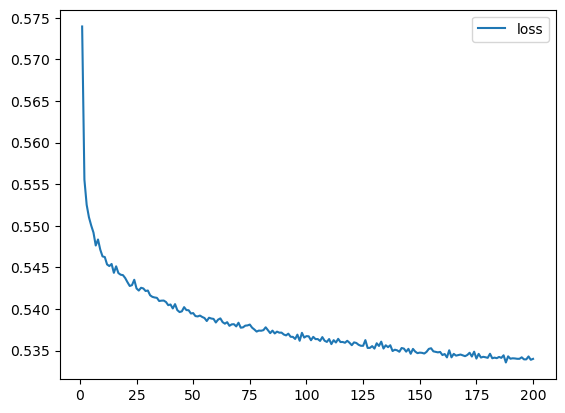

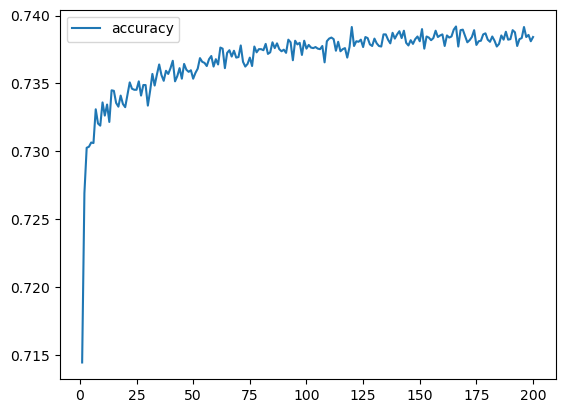

In [44]:
loss_plot = loss_df.plot(kind='line', y = 'loss')
accuracy_plot = accuracy_df.plot(kind='line', y = 'accuracy')

loss_plot, accuracy_plot